In [5]:
!pip install geopandas

In [6]:
!pip install geoplot

In [31]:
import matplotlib.pyplot as plt

In [8]:
#import matplotlib

%matplotlib inline

In [9]:
import pandas as pd

In [10]:
import geopandas as gp

In [11]:
import geoplot as gplt

In [ ]:
import geoplot.crs as gcrs

In [35]:
!pip install descartes

In [36]:
import descartes

In [37]:
import pylab

pylab.rcParams['figure.figsize'] = (20., 16.)

In [19]:
data_path = "./data/London_Borough_Excluding_MHW.shp"
londonBoroughs = gp.read_file(data_path)

londonBoroughs.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


In [24]:
data_path = "./data/housing-density-borough.csv" #use csv file
df = pd.read_csv(data_path)

df.head()

,Code,Name,Year,Source,Population,Inland_Area _Hectares,Total_Area_Hectares,Population_per_hectare,Square_Kilometres,Population_per_square_kilometre
0,E09000001,City of London,1999,ONS MYE,6581,290.4,314.9,22.7,2.9,2266.2
1,E09000001,City of London,2000,ONS MYE,7014,290.4,314.9,24.2,2.9,2415.3
2,E09000001,City of London,2001,ONS MYE,7359,290.4,314.9,25.3,2.9,2534.1
3,E09000001,City of London,2002,ONS MYE,7280,290.4,314.9,25.1,2.9,2506.9
4,E09000001,City of London,2003,ONS MYE,7115,290.4,314.9,24.5,2.9,2450.1


In [25]:
df15 = df[df['Year']==2015]

In [26]:
geojobs = londonBoroughs.merge(df15, left_on='GSS_CODE', right_on='Code')
            #geodataframe       #dataframe

In [39]:
original_crs = geojobs.crs
target_crs = {'datum':'WGS84', 'no_defs':True, 'proj':'merc'}
projected_geojobs = geojobs.to_crs(crs=target_crs)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


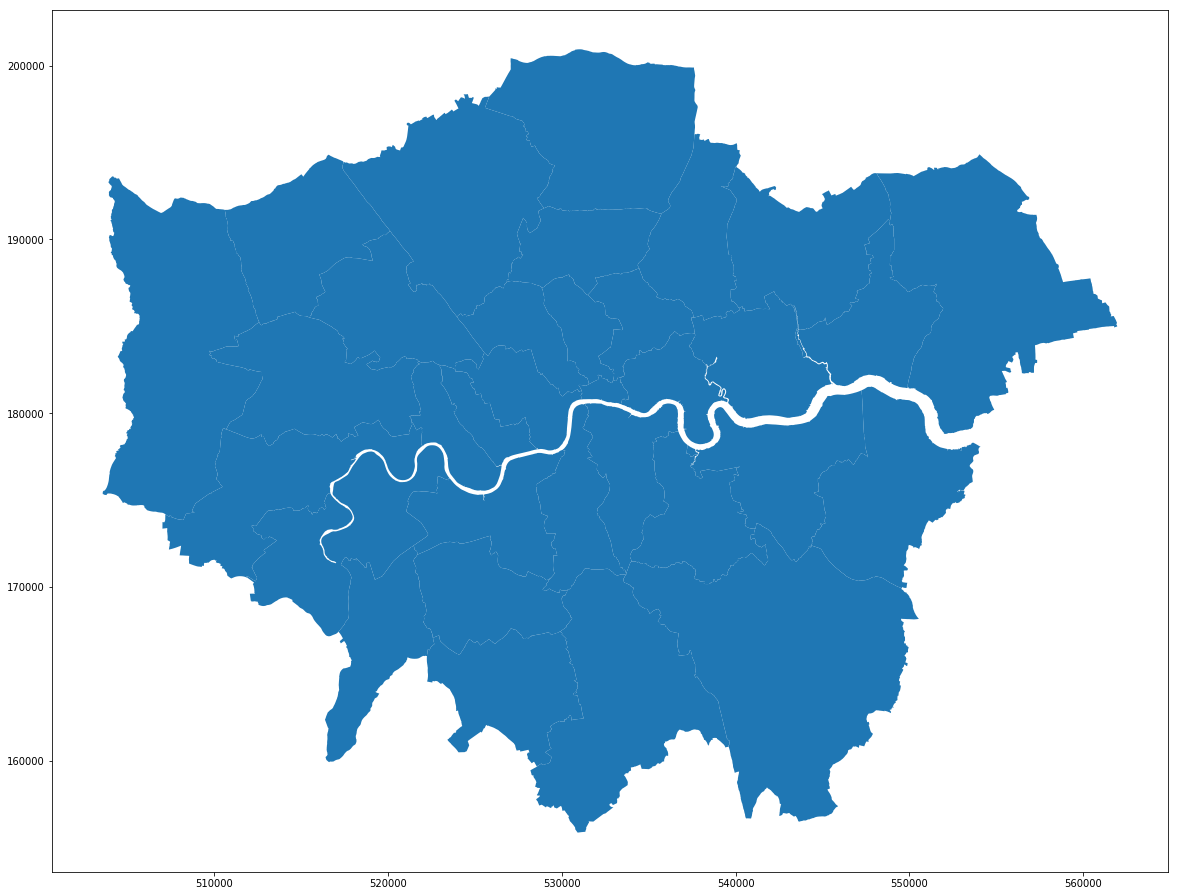

In [43]:
geojobs.plot()

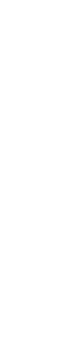

In [42]:
gplt.polyplot(projected_geojobs)

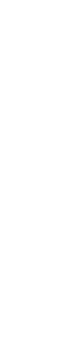

In [40]:
gplt.cartogram(projected_geojobs, scale='Population')